In [1]:
import pandas as pd
import numpy as np


In [30]:
df = pd.read_csv('rating.csv')

In [31]:
df.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [4]:
df['user_id'].nunique()

73515

In [5]:
df.shape

(7813737, 3)

In [6]:
df['anime_id'].nunique()

11200

In [7]:
from matplotlib import pyplot as plt


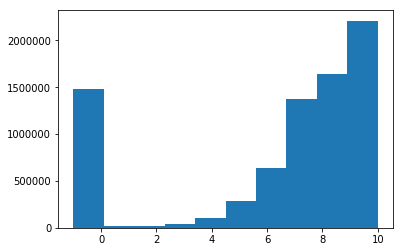

In [8]:
plt.hist(df['rating'])
plt.show()

In [9]:
sum(df['rating'] == -1)/df.shape[0]

0.18896156858107716

In [32]:
df = df[df['rating'] > 0]

In [33]:
## Converting user_id and item_id to codes
df.user_id = df.user_id.astype('category').cat.codes.values
df.anime_id = df.anime_id.astype('category').cat.codes.values

In [10]:
df.head()

,user_id,anime_id,rating
47,0,5119,10
81,0,6290,10
83,0,6323,10
101,0,6898,10
153,1,6329,10


In [7]:
df = df.reset_index()

In [8]:
df.pop('index')
df = df[df.index < 2000]

In [9]:
df.shape

(2000, 3)

In [10]:
df.head()

,user_id,anime_id,rating
0,0,5119,10
1,0,6290,10
2,0,6323,10
3,0,6898,10
4,1,6329,10


In [34]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [35]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_movies = len(df.user_id.unique()), len(df.anime_id.unique())
n_latent_factors = 3

In [36]:
anime_input = keras.layers.Input(shape=[1],name='Item')
anime_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(anime_input)
anime_vec = keras.layers.Flatten(name='FlattenAnime')(anime_embedding)

In [37]:
user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))
# from keras.layers import merge 
# prod = merge([anime_vec, user_vec], mode='dot',name='DotProduct')
# model = keras.Model([user_input, anime_input], prod)
# model.compile('rmsprop', 'mean_squared_error')

In [15]:
from keras.layers import add
#m = add([anime_vec, user_vec])
m = keras.layers.dot([anime_vec, user_vec], axes= -1)

In [16]:
model = keras.Model([user_input, anime_input], m)
model.compile('rmsprop', 'mean_squared_error')

In [17]:
##SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [17]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 3)         3393        Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         75          User[0][0]                       
__________________________________________________________________________________________________
FlattenAni

In [20]:
history = model.fit([train.user_id, train.anime_id], train.rating, epochs=100, verbose=1)

Epoch 1/100


InvalidArgumentError: indices[1,0] = 9312 is not in [0, 1131)
	 [[Node: Movie-Embedding/embedding_lookup = GatherV2[Taxis=DT_INT32, Tindices=DT_INT32, Tparams=DT_FLOAT, _class=["loc:@training/RMSprop/Assign_1"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](Movie-Embedding/embeddings/read, Movie-Embedding/Cast, training/RMSprop/gradients/Movie-Embedding/embedding_lookup_grad/concat/axis)]]

In [26]:
test.head()

,user_id,anime_id,rating
3507263,30705,7338,7
6499818,56894,5421,8
2973291,26101,2747,8
6058791,53802,19,8
1670131,15303,5691,9


In [25]:
type(train['user_id'][6977834])

numpy.int32

In [ ]:
df_anime_list= pd.read_csv()

In [21]:
## NNets

In [38]:
n_latent_factors_user = 5
n_latent_factors_movie = 8

movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2)(movie_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = keras.layers.Dropout(0.2)(user_vec)


concat = keras.layers.concatenate([movie_vec, user_vec], axis=-1)
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)
model = keras.Model([user_input, movie_input], result)
model.compile(optimizer=adam,loss= 'mean_absolute_error')

In [39]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 8)         79424       Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         348005      User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [ ]:
##train.user_id

In [40]:
history = model.fit([train.user_id, train.anime_id], train.rating, epochs=10, verbose=1)

Epoch 1/10
5069792/5069792 [==============================] - 1770s 349us/step - loss: 0.9788
Epoch 2/10
5069792/5069792 [==============================] - 1618s 319us/step - loss: 0.9339
Epoch 3/10
5069792/5069792 [==============================] - 965s 190us/step - loss: 0.9222
Epoch 4/10
5069792/5069792 [==============================] - 979s 193us/step - loss: 0.9154
Epoch 5/10
5069792/5069792 [==============================] - 8426s 2ms/step - loss: 0.9119
Epoch 6/10
5069792/5069792 [==============================] - 992s 196us/step - loss: 0.9092
Epoch 7/10
5069792/5069792 [==============================] - 969s 191us/step - loss: 0.9075
Epoch 8/10
5069792/5069792 [==============================] - 1010s 199us/step - loss: 0.9057
Epoch 9/10
5069792/5069792 [==============================] - 1003s 198us/step - loss: 0.9046
Epoch 10/10
5069792/5069792 [==============================] - 1026s 202us/step - loss: 0.9037


In [41]:
y_hat_2 = np.round(model.predict([test.user_id, test.anime_id]),0)
print(mean_absolute_error(y_true, y_hat_2))

print(mean_absolute_error(y_true, model.predict([test.user_id, test.anime_id])))

NameError: name 'mean_absolute_error' is not defined

In [42]:
from sklearn.metrics import mean_absolute_error

In [44]:
print(mean_absolute_error(test['rating'], y_hat_2))

print(mean_absolute_error(test['rating'], model.predict([test.user_id, test.anime_id])))

0.8596266989835488
0.886770064226335
